In [1]:
from hyperparameters import *
import torch
from simple_UNet import UNet
import matplotlib.pyplot as plt
from torchvision.utils import save_image

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/nianziyi/opt/anaconda3/envs/deep_learning_ex_1/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/nianziyi/opt/anaconda3/envs/deep_learning_ex_1/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: /Users/nianziyi/opt/anaconda3/envs/deep_learning_ex_1/lib/python3.10/site-packages/torchvision/image.so
  Expected in: /Users/nianziyi/opt/anaconda3/envs/deep_learning_ex_1/lib/python3.10/site-packages/torch/lib/libc10.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [3]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [4]:
PATH = r"results_dice/100epochs_0.001lr_20batch/network.pth"
#PATH = r"/Users/nianziyi/Desktop/Hair_Segmentation_Recoloring/simple_UNet/results_dice/20epochs_0.001lr_20batch/network.pth"
unet = UNet(in_channels=3,
            out_channels=1,
            n_class=1,
            kernel_size=3,
            padding=1,
            stride=1).to(device)

In [5]:
unet.load_state_dict(torch.load(PATH, map_location=torch.device('cpu')))

<All keys matched successfully>

In [6]:
acc = 0
batch_count = 0

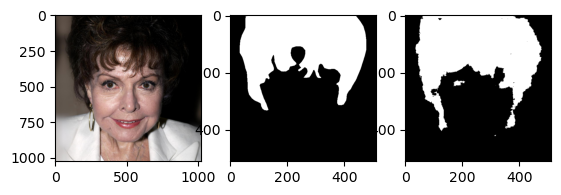

In [25]:
i = 0

for x,y in test_loader:
    index = 10
    x = torch.permute(x, (0, 3, 1, 2))
    
    out = torch.squeeze(unet(x)) #output for compute test accuracy
    out_visual = out_to_mask(out[index]) #print one output result
    out_nograd = out_visual.detach().numpy()
    
    for idx in range(batch_size): 
        save_image(x[idx], f'/Users/nianziyi/Desktop/Hair_Segmentation_Recoloring/saveimage/ori_image/{idx + i*batch_size}.png')
        save_image(out[idx], f'/Users/nianziyi/Desktop/Hair_Segmentation_Recoloring/saveimage/pred_mask/{idx + i*batch_size}.png')

    x = torch.permute(x, (0, 2, 3, 1))
    x_visual = x[index] #print one original image
    # x = x.detach().numpy()
    
    y_visual = torch.squeeze(y)[index] #print one original mask
    # y_1 = y_1.detach().numpy()
    
    plt.subplot(1,3,1)
    plt.imshow(x_visual)
    
    plt.subplot(1,3,2)
    plt.imshow(y_visual, cmap='gray')
    
    plt.subplot(1,3,3)
    plt.imshow(out_nograd, cmap='gray')

    
    acc_temp = acc_fn(out, y, batch_size) #compute accuracy for each batch
    acc += acc_temp #add current batch accuracy
    batch_count += 1 #count number of batches in testset
    
    i += 1

In [ ]:
images.shape #torch.Size([64,3,28,28])
img1 = images[0] #torch.Size([3,28,28]
# img1 = img1.numpy() # TypeError: tensor or list of tensors expected, got <class 'numpy.ndarray'>
save_image(img1, 'img1.png')

In [8]:
acc

16.37566041946411

In [9]:
acc = acc / batch_count
print(acc)

0.8618768641823217


In [10]:
acc = acc_fn(out, y, batch_size)